In [31]:
import math
import random
from datetime import timedelta
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()   
import warnings
warnings.filterwarnings('ignore')

In [32]:
plt.style.use('fivethirtyeight')

In [33]:
#dateparse = lambda dates: [pd.datetime.strptime(d, '%Y-%m-%d') for d in dates]
df = pd.read_csv('covid_19_clean_complete.csv',sep=',',parse_dates=['Date'], encoding = "ISO-8859-1")
df.sample(6)

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered
25311,Diamond Princess,Canada,0.0000,0.0000,2020-04-26,0,1,0
4563,Shanxi,China,37.5777,112.2922,2020-02-08,115,0,21
25386,Ontario,Canada,51.2538,-85.3232,2020-04-27,15970,1023,0
4028,Liaoning,China,41.2956,122.6085,2020-02-06,94,0,5
25514,NaN,New Zealand,-40.9006,174.8860,2020-04-27,1472,19,1214
23122,NaN,Maldives,3.2028,73.2207,2020-04-18,35,0,16


In [3]:
print(len(df))

26400


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26400 entries, 0 to 26399
Data columns (total 8 columns):
Province/State    8000 non-null object
Country/Region    26400 non-null object
Lat               26400 non-null float64
Long              26400 non-null float64
Date              26400 non-null datetime64[ns]
Confirmed         26400 non-null int64
Deaths            26400 non-null int64
Recovered         26400 non-null int64
dtypes: datetime64[ns](1), float64(2), int64(3), object(2)
memory usage: 1.6+ MB


In [34]:
df=df.rename(columns={'Province/State': 'State','Country/Region': 'Country'})

In [6]:
df.sample(6)

,State,Country,Lat,Long,Date,Confirmed,Deaths,Recovered
25161,Zhejiang,China,29.1832,120.0934,2020-04-26,1268,1,1258
3565,NaN,Iran,32.0000,53.0000,2020-02-04,0,0,0
18867,NaN,Guatemala,15.7835,-90.2308,2020-04-02,47,1,12
25828,Gibraltar,United Kingdom,36.1408,-5.3536,2020-04-28,141,0,131
13036,NaN,Equatorial Guinea,1.5000,10.0000,2020-03-11,0,0,0
3065,NaN,Mongolia,46.8625,103.8467,2020-02-02,0,0,0


In [39]:
grouped_TURKEY = df[df['Country'] == "Turkey"].reset_index()
grouped_TURKEY_date = grouped_TURKEY.groupby('Date')['Date', 'Confirmed', 'Deaths','Recovered'].sum().reset_index()
grouped_TURKEY_date['active']=grouped_TURKEY_date['Confirmed']-grouped_TURKEY_date['Recovered']


In [42]:
fig = px.line(grouped_TURKEY_date, x="Date", y="active", 
              title=f"active Cases in TURKEY Over Time", 
             color_discrete_sequence=['#d62728'],
              
              height=500
             )

fig.update_layout({
'plot_bgcolor': 'rgba(0, 0, 0, 0)',
'paper_bgcolor': 'rgba(0, 0, 0, 0)',
})


fig.show()


In [8]:
df['State'] = df['State'].fillna('')
temp = df[[col for col in df.columns if col != 'State']]
country = temp[temp['Date'] == max(temp['Date'])].reset_index()
country_grouped = country.groupby('Country')['Confirmed', 'Deaths','Recovered'].sum().reset_index()
country_grouped['Active']=country_grouped['Confirmed']-country_grouped['Recovered']

In [9]:
country_grouped.sample(8)

,Country,Confirmed,Deaths,Recovered,Active
74,Haiti,81,8,8,73
1,Albania,773,31,470,303
172,Turkey,120204,3174,48886,71318
81,Iran,94640,6028,75103,19537
47,Denmark,9356,452,6741,2615
116,Morocco,4423,170,984,3439
37,Colombia,6507,293,1439,5068
25,Bulgaria,1506,66,266,1240


In [43]:
fig = px.bar(country_grouped.sort_values('Active', ascending=False)[:20][::-1], 
             x='Active', y='Country',
             title='Active Cases Worldwide', text='Confirmed', height=1000, orientation='h')

fig.update_layout({
'plot_bgcolor': 'rgba(0, 0, 0, 0)',
'paper_bgcolor': 'rgba(0, 0, 0, 0)',
})


fig.show()

In [11]:
dates=grouped_TURKEY_date['Date']
dates2=np.array([i for i in range(len(dates))]).reshape(-1, 1)
grouped_TURKEY_date2=np.array(grouped_TURKEY_date['Confirmed']).reshape(-1, 1)


days_in_future = 10
future_forcast = np.array([i for i in range(len(dates)+days_in_future)]).reshape(-1, 1)
#adjusted_dates
adjusted_dates = future_forcast[:-10]

In [ ]:
print(adjusted_dates)

In [14]:
dates.tail()
dates.head()

0   2020-01-22
1   2020-01-23
2   2020-01-24
3   2020-01-25
4   2020-01-26
Name: Date, dtype: datetime64[ns]

In [15]:
import datetime

start = '01/22/2020'
start_date = datetime.datetime.strptime(start, '%m/%d/%Y')
future_forcast_dates = []
for i in range(len(future_forcast)):
    future_forcast_dates.append((start_date + datetime.timedelta(days=i)).strftime('%m/%d/%Y'))

In [16]:
print(future_forcast_dates)

['01/22/2020', '01/23/2020', '01/24/2020', '01/25/2020', '01/26/2020', '01/27/2020', '01/28/2020', '01/29/2020', '01/30/2020', '01/31/2020', '02/01/2020', '02/02/2020', '02/03/2020', '02/04/2020', '02/05/2020', '02/06/2020', '02/07/2020', '02/08/2020', '02/09/2020', '02/10/2020', '02/11/2020', '02/12/2020', '02/13/2020', '02/14/2020', '02/15/2020', '02/16/2020', '02/17/2020', '02/18/2020', '02/19/2020', '02/20/2020', '02/21/2020', '02/22/2020', '02/23/2020', '02/24/2020', '02/25/2020', '02/26/2020', '02/27/2020', '02/28/2020', '02/29/2020', '03/01/2020', '03/02/2020', '03/03/2020', '03/04/2020', '03/05/2020', '03/06/2020', '03/07/2020', '03/08/2020', '03/09/2020', '03/10/2020', '03/11/2020', '03/12/2020', '03/13/2020', '03/14/2020', '03/15/2020', '03/16/2020', '03/17/2020', '03/18/2020', '03/19/2020', '03/20/2020', '03/21/2020', '03/22/2020', '03/23/2020', '03/24/2020', '03/25/2020', '03/26/2020', '03/27/2020', '03/28/2020', '03/29/2020', '03/30/2020', '03/31/2020', '04/01/2020', '04/0

In [53]:
import numpy as np 
import matplotlib.pyplot as plt 
import matplotlib.colors as mcolors
import pandas as pd 
import random
import math
import time
from sklearn.linear_model import LinearRegression, BayesianRidge
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error
import datetime
import operator 

%matplotlib inline 

In [54]:
plt.style.use('fivethirtyeight')

In [18]:
print(grouped_TURKEY_date2.shape)
print(dates2.shape)

(100, 1)
(100, 1)


In [19]:
X_train_confirmed, X_test_confirmed, y_train_confirmed, y_test_confirmed = train_test_split(dates2, grouped_TURKEY_date2, test_size=0.25, shuffle=False) 

In [20]:
svm_confirmed = SVR(shrinking=True, kernel='poly',gamma=0.01, epsilon=1,degree=5, C=0.1)
svm_confirmed.fit(X_train_confirmed, y_train_confirmed)
svm_pred = svm_confirmed.predict(future_forcast)

In [21]:
print(len(svm_pred))

110


MAE: 47791.762088688156
MSE: 2536137289.4659023


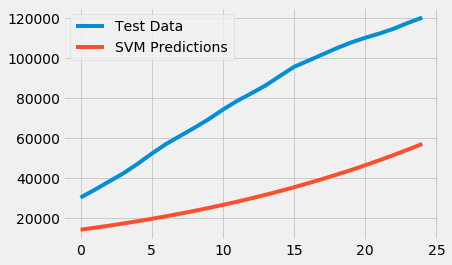

In [55]:
svm_test_pred = svm_confirmed.predict(X_test_confirmed)
plt.plot(y_test_confirmed)
plt.plot(svm_test_pred)
plt.legend(['Test Data', 'SVM Predictions'])
#plt.rcParams['figure.facecolor'] = 'white'
print('MAE:', mean_absolute_error(svm_test_pred, y_test_confirmed))
print('MSE:',mean_squared_error(svm_test_pred, y_test_confirmed))

In [56]:
# transform our data for polynomial regression
poly = PolynomialFeatures(degree=3)
poly_X_train_confirmed = poly.fit_transform(X_train_confirmed)
poly_X_test_confirmed = poly.fit_transform(X_test_confirmed)
poly_future_forcast = poly.fit_transform(future_forcast)

In [57]:
# polynomial regression
linear_model = LinearRegression(normalize=True, fit_intercept=False)
linear_model.fit(poly_X_train_confirmed, y_train_confirmed)
test_linear_pred = linear_model.predict(poly_X_test_confirmed)
linear_pred = linear_model.predict(poly_future_forcast)
print('MAE:', mean_absolute_error(test_linear_pred, y_test_confirmed))
print('MSE:',mean_squared_error(test_linear_pred, y_test_confirmed))

MAE: 23019.11359934859
MSE: 583117018.037228


In [58]:
print(linear_model.coef_)

[[-2.78030818e+03  6.44293951e+02 -2.87881656e+01  3.31512094e-01]]


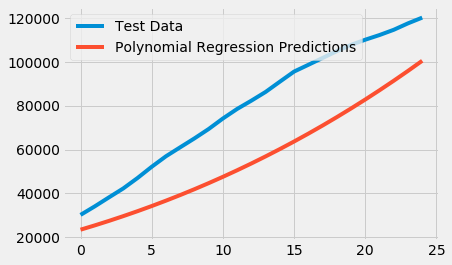

In [59]:
plt.plot(y_test_confirmed)
plt.plot(test_linear_pred)
plt.legend(['Test Data', 'Polynomial Regression Predictions'])

In [60]:
def plot_predictions(x, y, pred, algo_name, color):
    plt.figure(figsize=(16, 9))
    plt.plot(x, y)
    plt.plot(future_forcast, pred, linestyle='dashed', color=color)
    plt.title('Coronavirus Cases Over Time', size=30)
    plt.xlabel('Days Since 1/22/2020', size=30)
    plt.ylabel('Cases', size=30)
    plt.legend(['Confirmed Cases', algo_name], prop={'size': 20})
    plt.xticks(size=20)
    plt.yticks(size=20)
    plt.show()

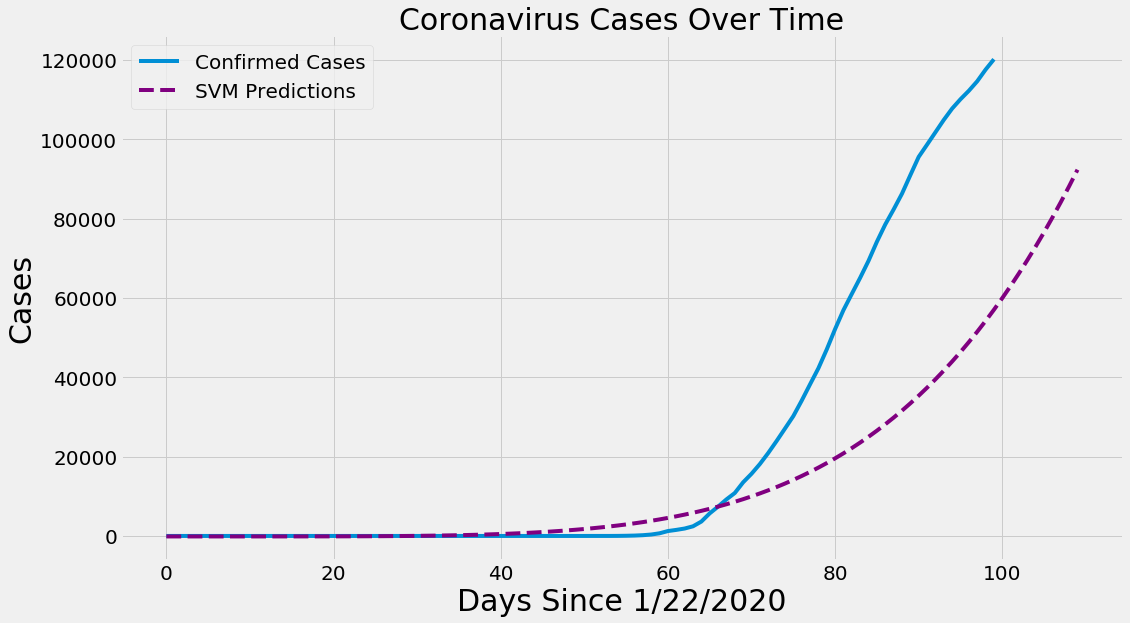

In [61]:
adjusted_dates = adjusted_dates.reshape(1, -1)[0]
plot_predictions(adjusted_dates, grouped_TURKEY_date['Confirmed'], svm_pred, 'SVM Predictions', 'purple')

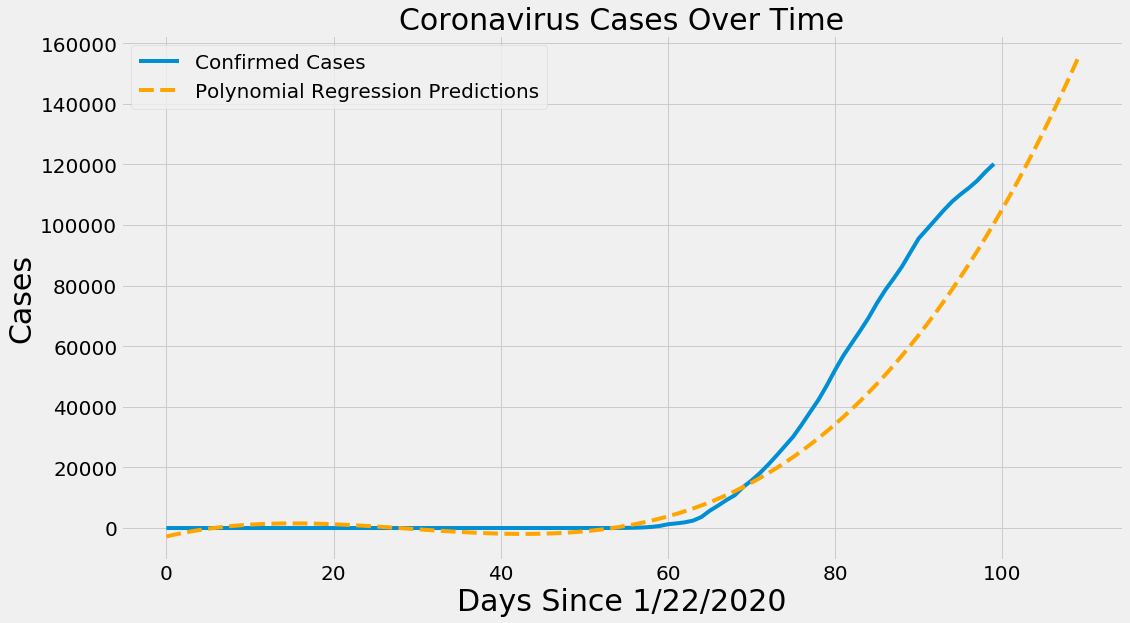

In [62]:
plot_predictions(adjusted_dates, grouped_TURKEY_date['Confirmed'], linear_pred, 'Polynomial Regression Predictions', 'orange')

In [63]:
svm_df = pd.DataFrame({'Date': future_forcast_dates[-10:], 'SVM Predicted # of Confirmed Cases in Turkey': np.round(svm_pred[-10:])})
svm_df

,Date,SVM Predicted # of Confirmed Cases in Turkey
0,05/01/2020,59984.0
1,05/02/2020,63050.0
2,05/03/2020,66240.0
3,05/04/2020,69558.0
4,05/05/2020,73007.0
5,05/06/2020,76591.0
6,05/07/2020,80314.0
7,05/08/2020,84180.0
8,05/09/2020,88194.0
9,05/10/2020,92359.0


In [64]:
# Future predictions using polynomial regression
linear_pred = linear_pred.reshape(1,-1)[0]
svm_df = pd.DataFrame({'Date': future_forcast_dates[-10:], 'Turkey': np.round(linear_pred[-10:])})
svm_df

,Date,Turkey
0,05/01/2020,105280.0
1,05/02/2020,110183.0
2,05/03/2020,115229.0
3,05/04/2020,120421.0
4,05/05/2020,125759.0
5,05/06/2020,131248.0
6,05/07/2020,136887.0
7,05/08/2020,142680.0
8,05/09/2020,148628.0
9,05/10/2020,154733.0


In [65]:
new_cases=[]
new_case=[]
for i in range(0, len(svm_df['Date'])):
    x=svm_df['Turkey'][i]
    new_cases.append(x)
for i in range(0, (len(new_cases)-1)):
    x=new_cases[i+1]-new_cases[i]
    new_case.append(x)
    

In [66]:
new_case_df=pd.DataFrame({'Date': future_forcast_dates[-9:], 'new case predict in Turkey':new_case})
new_case_df

,Date,new case predict in Turkey
0,05/02/2020,4903.0
1,05/03/2020,5046.0
2,05/04/2020,5192.0
3,05/05/2020,5338.0
4,05/06/2020,5489.0
5,05/07/2020,5639.0
6,05/08/2020,5793.0
7,05/09/2020,5948.0
8,05/10/2020,6105.0


In [67]:
bayesian_poly = PolynomialFeatures(degree=4)
bayesian_poly_X_train_confirmed = bayesian_poly.fit_transform(X_train_confirmed)
bayesian_poly_X_test_confirmed = bayesian_poly.fit_transform(X_test_confirmed)
bayesian_poly_future_forcast = bayesian_poly.fit_transform(future_forcast)

In [68]:
tol = [1e-6, 1e-5, 1e-4, 1e-3, 1e-2]
alpha_1 = [1e-7, 1e-6, 1e-5, 1e-4, 1e-3]
alpha_2 = [1e-7, 1e-6, 1e-5, 1e-4, 1e-3]
lambda_1 = [1e-7, 1e-6, 1e-5, 1e-4, 1e-3]
lambda_2 = [1e-7, 1e-6, 1e-5, 1e-4, 1e-3]
normalize = [True, False]

bayesian_grid = {'tol': tol, 'alpha_1': alpha_1, 'alpha_2' : alpha_2, 'lambda_1': lambda_1, 'lambda_2' : lambda_2, 
                 'normalize' : normalize}

bayesian = BayesianRidge(fit_intercept=False)
bayesian_search = RandomizedSearchCV(bayesian, bayesian_grid, scoring='neg_mean_squared_error', cv=3, return_train_score=True, n_jobs=-1, n_iter=40, verbose=1)
bayesian_search.fit(bayesian_poly_X_train_confirmed, y_train_confirmed)

Fitting 3 folds for each of 40 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    4.1s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:    4.2s finished


RandomizedSearchCV(cv=3, error_score='raise',
          estimator=BayesianRidge(alpha_1=1e-06, alpha_2=1e-06, compute_score=False, copy_X=True,
       fit_intercept=False, lambda_1=1e-06, lambda_2=1e-06, n_iter=300,
       normalize=False, tol=0.001, verbose=False),
          fit_params=None, iid=True, n_iter=40, n_jobs=-1,
          param_distributions={'tol': [1e-06, 1e-05, 0.0001, 0.001, 0.01], 'alpha_1': [1e-07, 1e-06, 1e-05, 0.0001, 0.001], 'alpha_2': [1e-07, 1e-06, 1e-05, 0.0001, 0.001], 'lambda_1': [1e-07, 1e-06, 1e-05, 0.0001, 0.001], 'lambda_2': [1e-07, 1e-06, 1e-05, 0.0001, 0.001], 'normalize': [True, False]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score=True, scoring='neg_mean_squared_error',
          verbose=1)

In [69]:
bayesian_search.best_params_

{'tol': 1e-05,
 'normalize': True,
 'lambda_2': 0.001,
 'lambda_1': 0.001,
 'alpha_2': 0.0001,
 'alpha_1': 0.0001}

In [70]:
bayesian_confirmed = bayesian_search.best_estimator_
test_bayesian_pred = bayesian_confirmed.predict(bayesian_poly_X_test_confirmed)
bayesian_pred = bayesian_confirmed.predict(bayesian_poly_future_forcast)
print('MAE:', mean_absolute_error(test_bayesian_pred, y_test_confirmed))
print('MSE:',mean_squared_error(test_bayesian_pred, y_test_confirmed))

MAE: 18622.077228862538
MSE: 390244717.9920509


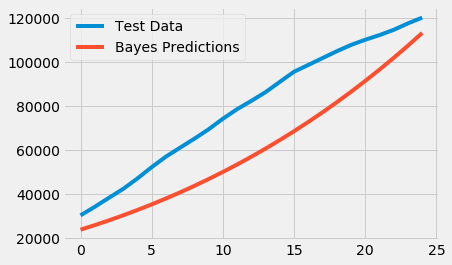

In [73]:
plt.plot(y_test_confirmed)
plt.plot(test_bayesian_pred)
plt.legend(['Test Data', 'Bayes Predictions'])

In [74]:
svm_df = pd.DataFrame({'Date': future_forcast_dates[-10:], 'Bayesian  of Confirmed Cases Worldwide': np.round(bayesian_pred[-10:])})
svm_df

,Date,Bayesian of Confirmed Cases Worldwide
0,05/01/2020,119218.0
1,05/02/2020,125430.0
2,05/03/2020,131870.0
3,05/04/2020,138544.0
4,05/05/2020,145457.0
5,05/06/2020,152614.0
6,05/07/2020,160021.0
7,05/08/2020,167684.0
8,05/09/2020,175609.0
9,05/10/2020,183800.0


In [75]:
df['active']=df['Confirmed']-df['Recovered']

In [135]:
df.info()

dfconfirmed=pd.DataFrame({'Confirmed': df.groupby('Date')['Confirmed'].sum()}) 
dfdeaths=pd.DataFrame({'Deaths': df.groupby('Date')['Deaths'].sum()}) 
dfrecover=pd.DataFrame({'Recovered': df.groupby('Date')['Recovered'].sum()}) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26400 entries, 0 to 26399
Data columns (total 9 columns):
State        26400 non-null object
Country      26400 non-null object
Lat          26400 non-null float64
Long         26400 non-null float64
Date         26400 non-null datetime64[ns]
Confirmed    26400 non-null int64
Deaths       26400 non-null int64
Recovered    26400 non-null int64
active       26400 non-null int64
dtypes: datetime64[ns](1), float64(2), int64(4), object(2)
memory usage: 1.8+ MB


In [136]:
#dfconfirmed['Confirmed'][0]
datesss = dates.keys()
datesss

RangeIndex(start=0, stop=100, step=1)

In [140]:
world_cases = []
mortality_rate = []
recovery_rate = []
total_deaths = []
total_recovered = []
total_active = []
for i in datesss:
    confirmed_sum = dfconfirmed['Confirmed'][i]
    death_sum = dfdeaths['Deaths'][i]
    recovered_sum=dfrecover['Recovered'][i]
    world_cases.append(confirmed_sum)
    mortality_rate.append(death_sum/confirmed_sum)
    recovery_rate.append(recovered_sum/confirmed_sum)
    total_deaths.append(death_sum)
    total_recovered.append(recovered_sum)
    total_active.append(confirmed_sum-death_sum-recovered_sum)

In [ ]:
world_cases

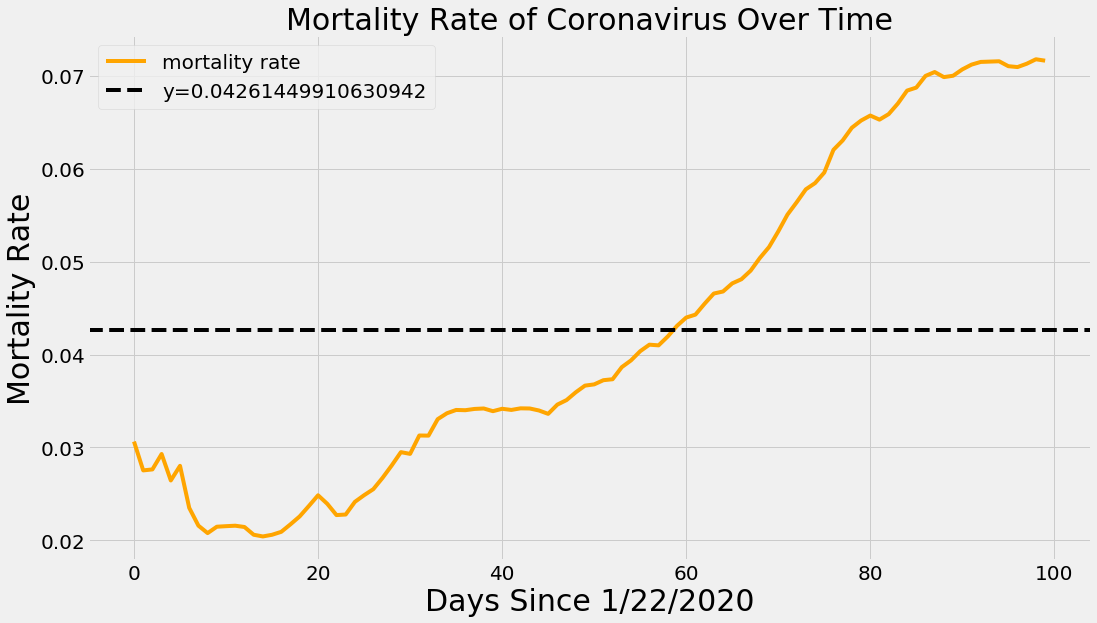

In [138]:
mean_mortality_rate = np.mean(mortality_rate)
plt.figure(figsize=(16, 9))
plt.plot(adjusted_dates, mortality_rate, color='orange')
plt.axhline(y = mean_mortality_rate,linestyle='--', color='black')
plt.title('Mortality Rate of Coronavirus Over Time', size=30)
plt.legend(['mortality rate', 'y='+str(mean_mortality_rate)], prop={'size': 20})
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('Mortality Rate', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

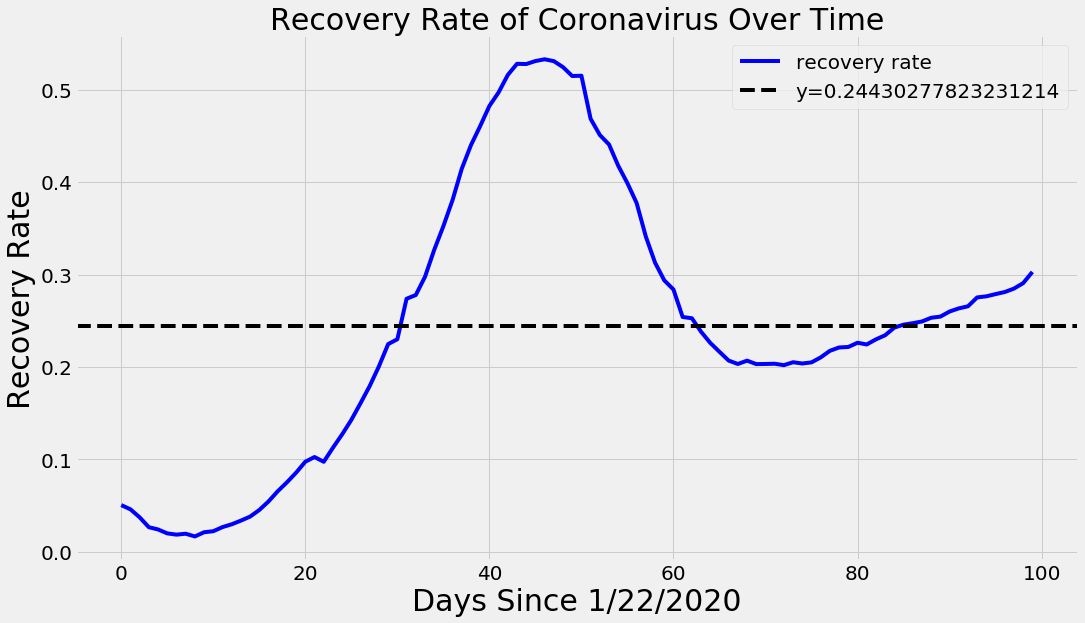

In [139]:
mean_recovery_rate = np.mean(recovery_rate)
plt.figure(figsize=(16, 9))
plt.plot(adjusted_dates, recovery_rate, color='blue')
plt.axhline(y = mean_recovery_rate,linestyle='--', color='black')
plt.title('Recovery Rate of Coronavirus Over Time', size=30)
plt.legend(['recovery rate', 'y='+str(mean_recovery_rate)], prop={'size': 20})
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('Recovery Rate', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

In [151]:
"""
plt.figure(figsize=(16, 9))
plt.plot(adjusted_dates, total_deaths, color='r')
plt.legend(['death'], loc='best', fontsize=20)
plt.title('Coronavirus Cases', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('Cases', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()
"""
fig = px.line( x=adjusted_dates, y=total_deaths, 
              title=f"Coronavirus Cases", 
             color_discrete_sequence=['#d62728'],
              height=500,
              labels={'x':'Days Since 1/22/2020', 'y':'Cases'}
             )

fig.update_layout({
'plot_bgcolor': 'rgba(0, 0, 0, 0)',
'paper_bgcolor': 'rgba(0, 0, 0, 0)',
})


fig.show()

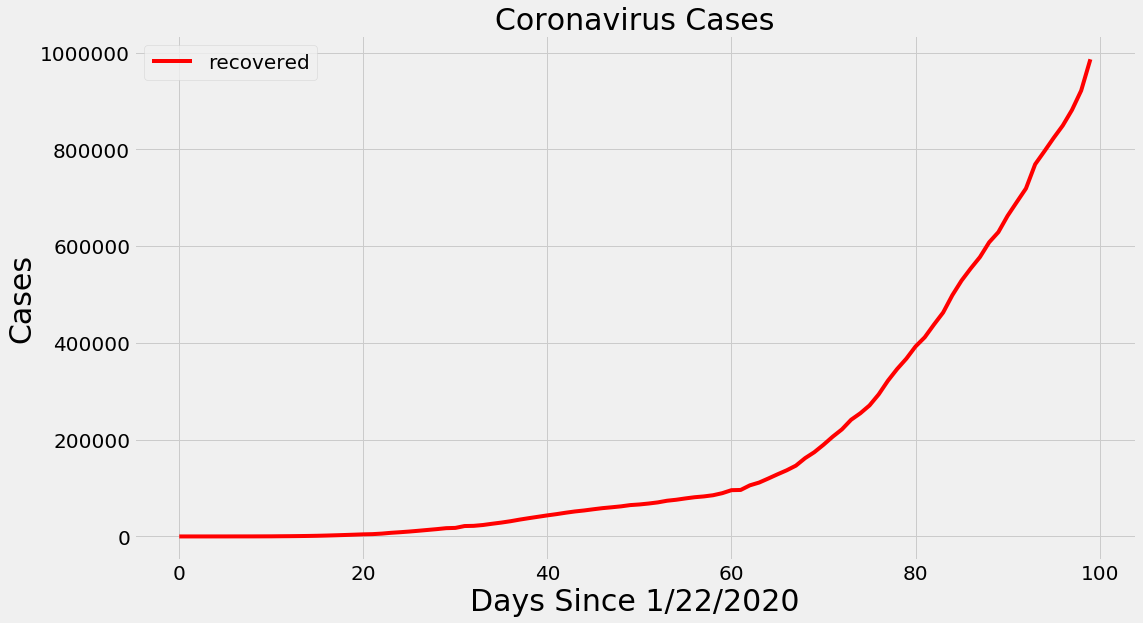

In [144]:
plt.figure(figsize=(16, 9))
plt.plot(adjusted_dates, total_recovered, color='r')
plt.legend(['recovered'], loc='best', fontsize=20)
plt.title('Coronavirus Cases', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('Cases', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

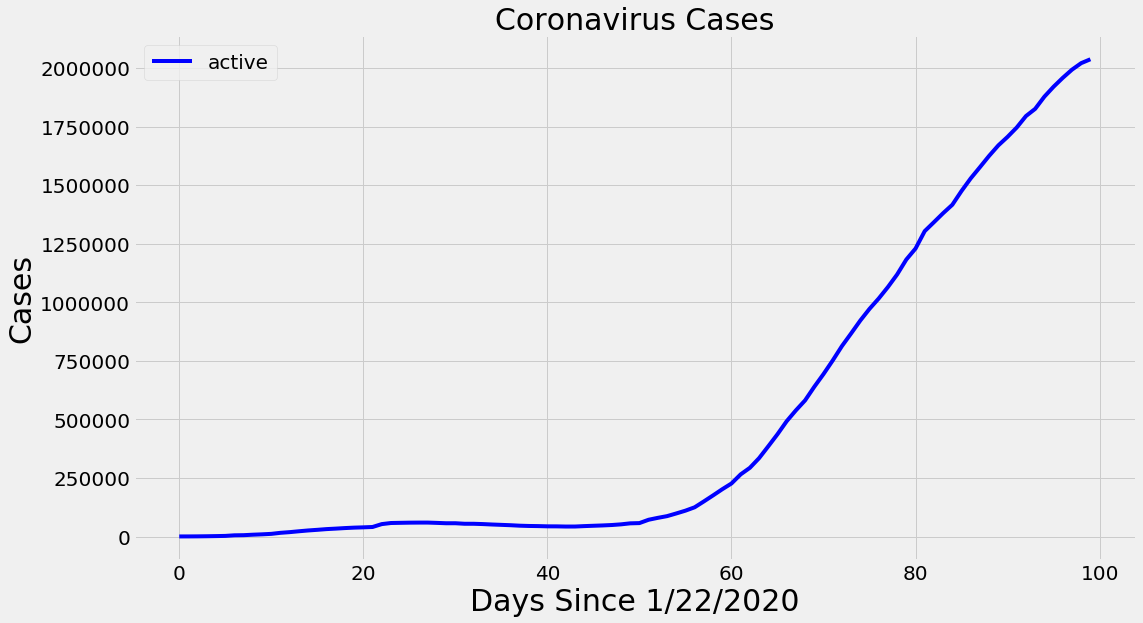

In [145]:
plt.figure(figsize=(16, 9))
plt.plot(adjusted_dates, total_active, color='blue')
plt.legend(['active'], loc='best', fontsize=20)
plt.title('Coronavirus Cases', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('Cases', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

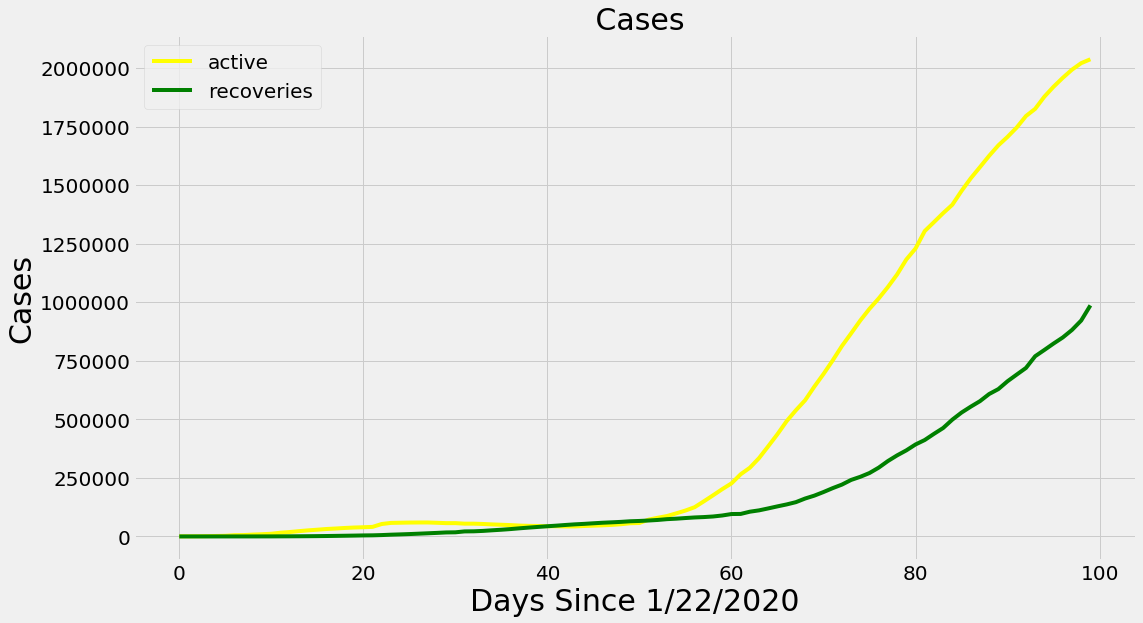

In [146]:
plt.figure(figsize=(16, 9))
plt.plot(adjusted_dates, total_active, color='yellow')
plt.plot(adjusted_dates, total_recovered, color='green')
plt.legend(['active', 'recoveries'], loc='best', fontsize=20)
plt.title(' Cases', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('Cases', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()